# Exercise 3

In [32]:
!pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.datasets import fetch_california_housing
import pandas as pd

housing = fetch_california_housing(as_frame=True)

In [15]:
target = housing.target

In [16]:
features.head()

,Longitude,Latitude
0,-122.23,37.88
1,-122.22,37.86
2,-122.24,37.85
3,-122.25,37.85
4,-122.25,37.85


In [5]:
features = housing.data[["Longitude", "Latitude"]]

In [6]:
df = pd.concat([features, target])
df

,Longitude,Latitude,MedHouseVal
0,-122.23,37.88,NaN
1,-122.22,37.86,NaN
2,-122.24,37.85,NaN
3,-122.25,37.85,NaN
4,-122.25,37.85,NaN
...,...,...,...
20635,NaN,NaN,0.781
20636,NaN,NaN,0.771
20637,NaN,NaN,0.923
20638,NaN,NaN,0.847


<Axes: xlabel='Longitude', ylabel='Latitude'>

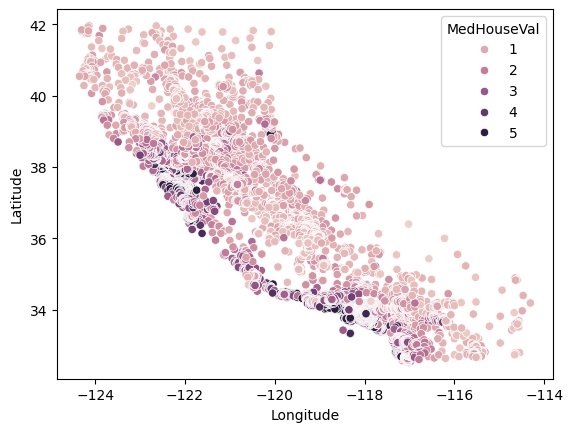

In [7]:
import seaborn as sns

sns.scatterplot(data = df, x = 'Longitude', y = 'Latitude', hue = 'MedHouseVal')

In [8]:
df['Latitude'].fillna(df['Latitude'].mean(), inplace=True)
df['Longitude'].fillna(df['Longitude'].mean(), inplace=True)

<ipython-input-8-bd68fb26486c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Latitude'].fillna(df['Latitude'].mean(), inplace=True)
<ipython-input-8-bd68fb26486c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['Latitude', 'Longitude']], df[['MedHouseVal']], test_size=0.33, random_state=0)

In [10]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, random_state=0)

<Axes: xlabel='Longitude', ylabel='Latitude'>

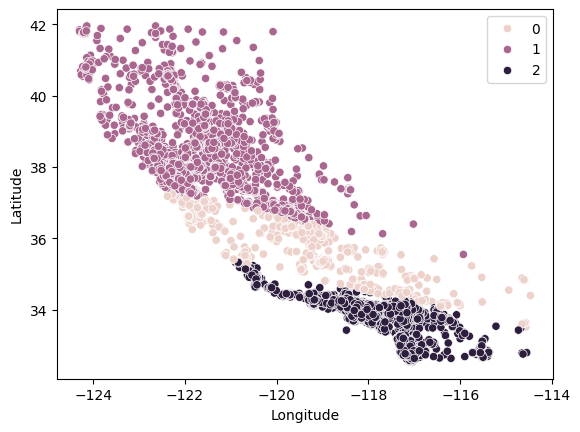

In [12]:
sns.scatterplot(data = X_train, x = 'Longitude', y = 'Latitude', hue = kmeans.labels_)

## Use the Elbow method to find the correct value of K

For cluster = 1, SSE/WCSS is 2.0690172605159725
For cluster = 2, SSE/WCSS is 0.8284273171163479
For cluster = 3, SSE/WCSS is 0.2896383867598299
For cluster = 4, SSE/WCSS is 0.132747199063285
For cluster = 5, SSE/WCSS is 0.08993069099852923
For cluster = 6, SSE/WCSS is 0.0546819256900248
For cluster = 7, SSE/WCSS is 0.04024303237480054
For cluster = 8, SSE/WCSS is 0.031246461538058726
For cluster = 9, SSE/WCSS is 0.025368883173397708
For cluster = 10, SSE/WCSS is 0.02021788410079479


Text(0, 0.5, 'WCSS')

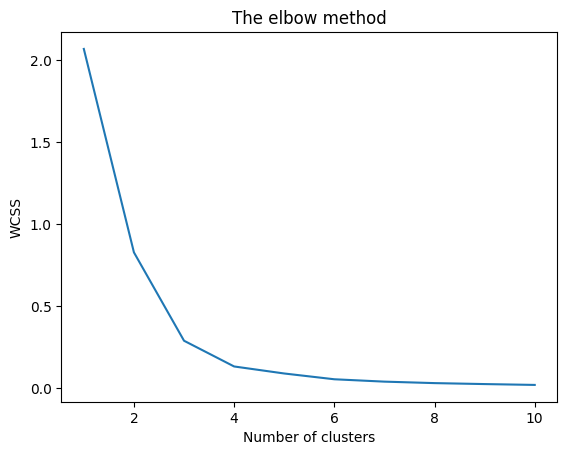

In [46]:
wcss=[]
sse = {}
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300,
                    n_init = 10, random_state = 0)
    kmeans.fit(X_train_norm)
    wcss.append(kmeans.inertia_)
    sse[i] = kmeans.inertia_
    print("For cluster = {}, SSE/WCSS is {}".format(i, sse[i]))

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

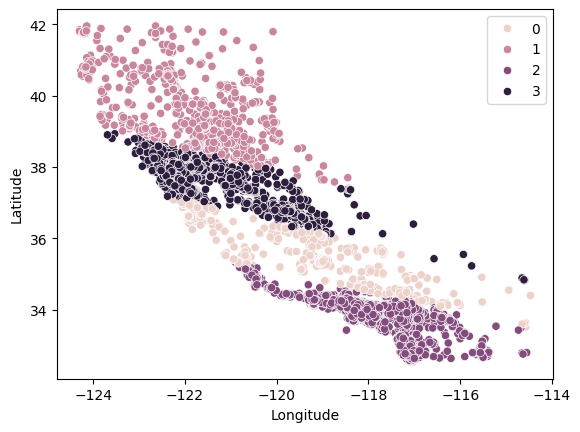

In [59]:
kmeans = KMeans(n_clusters = 4, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)
sns.scatterplot(data = X_train, x = 'Longitude', y = 'Latitude', hue = kmeans.labels_)
plt.show()

In [55]:
cluster_Kmeans = KMeans(n_clusters=4)
model_kmeans = cluster_Kmeans.fit(X_train_norm)
pred_kmeans = model_kmeans.labels_
print(pred_kmeans)

# Frequency count of the Output clusters
unique, counts = np.unique(pred_kmeans, return_counts=True)
dict(zip(unique, counts))

[2 0 1 ... 0 0 2]


{0: 14660, 1: 4170, 2: 7407, 3: 1420}

Original Cluster Frequency {-0.9634613177355222: 1, -0.9634565581803206: 1, -0.963449511492546: 1, -0.9634471278001646: 1, -0.9634436062650813: 1, -0.9634400863934497: 1, -0.9634353111765406: 1, -0.9634341807381551: 1, -0.9634282736784597: 2, -0.9634258821535404: 2, -0.9634247574227085: 1, -0.9634223652139267: 2, -0.9634199713051878: 2, -0.9634188499358757: 1, -0.963416455344119: 2, -0.9634129410443711: 2, -0.9634105440685997: 2, -0.963407030747758: 3, -0.9634046313869319: 3, -0.9634011190455994: 1, -0.9633987172986778: 1, -0.9633976083639388: 1, -0.9633952059374584: 1, -0.9633916962356676: 2, -0.9633833755014792: 1, -0.9633774581727664: 1, -0.9633739514142078: 2, -0.9633715394363209: 1, -0.9633680336600483: 1, -0.9633621144983232: 1, -0.9633561939285945: 1, -0.9633526917755075: 1, -0.9633467707811929: 1, -0.9633421952454311: 1, -0.9633408483786041: 3, -0.9633373498489788: 2, -0.963328999346852: 1, -0.9633279311314304: 1, -0.9633255027874718: 1, -0.9633230727168123: 1, -0.9633195771434

<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

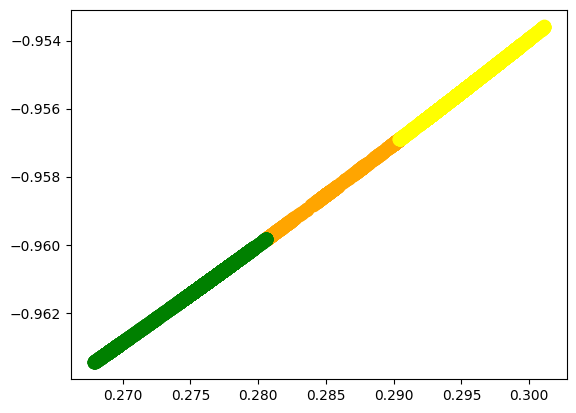

In [56]:
unique, counts = np.unique(X_train_norm, return_counts=True)
freq_1 = dict(zip(unique, counts))
freq_1

print('Original Cluster Frequency',freq_1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred_kmeans, return_counts=True)
print('K Means Output Cluster Frequency',dict(zip(unique, counts)))
# Silhouette Score
print('Silhouette Score for 4 Clusters',silhouette_score(X_train_norm,pred_kmeans))
print("\n")

# In the above output we got value labels: ‘0’, ‘1’  and ‘2’
# For a better understanding, we can visualize these clusters.

plt.scatter(X_train_norm[pred_kmeans == 0, 0], X_train_norm[pred_kmeans == 0, 1],
            s = 80, c = 'orange', label = 'Longitude')
plt.scatter(X_train_norm[pred_kmeans == 1, 0], X_train_norm[pred_kmeans == 1, 1],
            s = 80, c = 'yellow', label = 'Latitude')
plt.scatter(X_train_norm[pred_kmeans == 2, 0], X_train_norm[pred_kmeans == 2, 1],
            s = 80, c = 'green', label = 'MedHouseVal')
plt.legend

In [60]:
cluster_Kmeans = KMeans(n_clusters=5)
model_kmeans = cluster_Kmeans.fit(X_train_norm)
labels_1 = model_kmeans.labels_
print("Silhouette Score for 5 Cluster")
print(silhouette_score(X_train_norm,labels_1))
print('\n')

wcss = []

for k in range(2,20):
  kmeans = KMeans(n_clusters= k,max_iter=100).fit(X_train_norm)
  label = kmeans.labels_
  sil_coeff = silhouette_score(X_train_norm,label,metric = 'euclidean')
  print('For cluster= {}, Silhouette Coefficient is {}'.format(k,sil_coeff))

Silhouette Score for 5 Cluster
0.8231022486236492


For cluster= 2, Silhouette Coefficient is 0.6774341007663209
For cluster= 3, Silhouette Coefficient is 0.7952868357102353
For cluster= 4, Silhouette Coefficient is 0.8259131554789126
For cluster= 5, Silhouette Coefficient is 0.8230666867616595
For cluster= 6, Silhouette Coefficient is 0.8270780791269174
For cluster= 7, Silhouette Coefficient is 0.818385465899808
For cluster= 8, Silhouette Coefficient is 0.7791677535648056
For cluster= 9, Silhouette Coefficient is 0.7781359544487941
For cluster= 10, Silhouette Coefficient is 0.7835079027593259
For cluster= 11, Silhouette Coefficient is 0.7812910229473664
For cluster= 12, Silhouette Coefficient is 0.7843793690752255
For cluster= 13, Silhouette Coefficient is 0.7860394516025263
For cluster= 14, Silhouette Coefficient is 0.7840408509182875
For cluster= 15, Silhouette Coefficient is 0.7844509823619399
For cluster= 16, Silhouette Coefficient is 0.7857422584566757
For cluster= 17, Silhouette